- The MNIST dataset is one of the most famous datasets in machine learning and computer vision.

- Images: 70,000 grayscale images of handwritten digits (0 through 9)
  - 60,000 for training
  - 10,000 for testing

- Image size: 28 x 28 pixels (784 total pixels)

- Pixel values: 0 (black) to 255 (white).

In [1]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [2]:
# Load MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# Show the shape
print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)

Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)


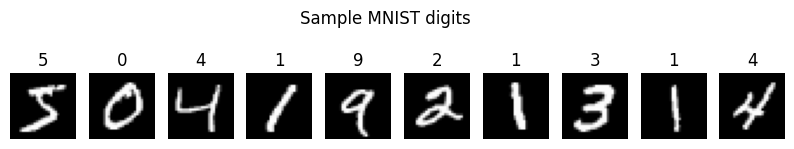

In [4]:
# Plot the first 10 images
plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.axis('off')
    plt.title(str(y_train[i]))
plt.suptitle("Sample MNIST digits")
plt.show()

In [5]:
#Normalization of input
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [6]:
# Flatten the 28x28 images into vectors of size 784
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2]) # Shape becomes (60000, 784)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2]) # Shape becomes (10000, 784)

In [7]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [8]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


In [9]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Input layer
input_img = Input(shape=(784,))

# Encoder
encoded1 = Dense(128, activation='relu')(input_img)
encoded2 = Dense(64, activation='relu')(encoded1)
encoded3 = Dense(32, activation='relu')(encoded2)  

# Decoder
decoded1 = Dense(64, activation='relu')(encoded3)
decoded2 = Dense(128, activation='relu')(decoded1)
output_img = Dense(784, activation='sigmoid')(decoded2)

# Autoencoder model
autoencoder = Model(input_img, output_img)

# Compile
autoencoder.compile(optimizer='adam', loss='mse')

In [10]:
autoencoder.fit(
    x_train,             # Input: images
    x_train,             # Target: same images (unsupervised)
    epochs=50,           # No if iterations
    batch_size=256,      # Reasonable batch size for MNIST
    shuffle=True,        # Shuffle data to avoid local patterns
    validation_data=(x_test, x_test)  # Evaluate on test set
)

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0951 - val_loss: 0.0343
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0311 - val_loss: 0.0236
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0229 - val_loss: 0.0204
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0201 - val_loss: 0.0182
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0182 - val_loss: 0.0166
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0168 - val_loss: 0.0156
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0155 - val_loss: 0.0143
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0146 - val_loss: 0.0136
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0138 - val_loss: 0.0130
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0132 - val_loss: 0.0126
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0128 - val_loss: 0.0121
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

In [11]:
# Model summary
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 784)            │       101,136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 667,154 (2.54 MB)

 Trainable params: 222,384 (868.69 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 444,770 (1.70 MB)